In [54]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [55]:
filename = "https://github.com/mchoimis/tsdl/raw/main/market/tr_eod_data_rounded.csv"
df = pd.read_csv(filename, parse_dates=True, index_col=0)
display(df.info())
display(df.head(3))
display(df.tail(3))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


None

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.8
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.7


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.16,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.17,1252.25,22.31,118.65


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

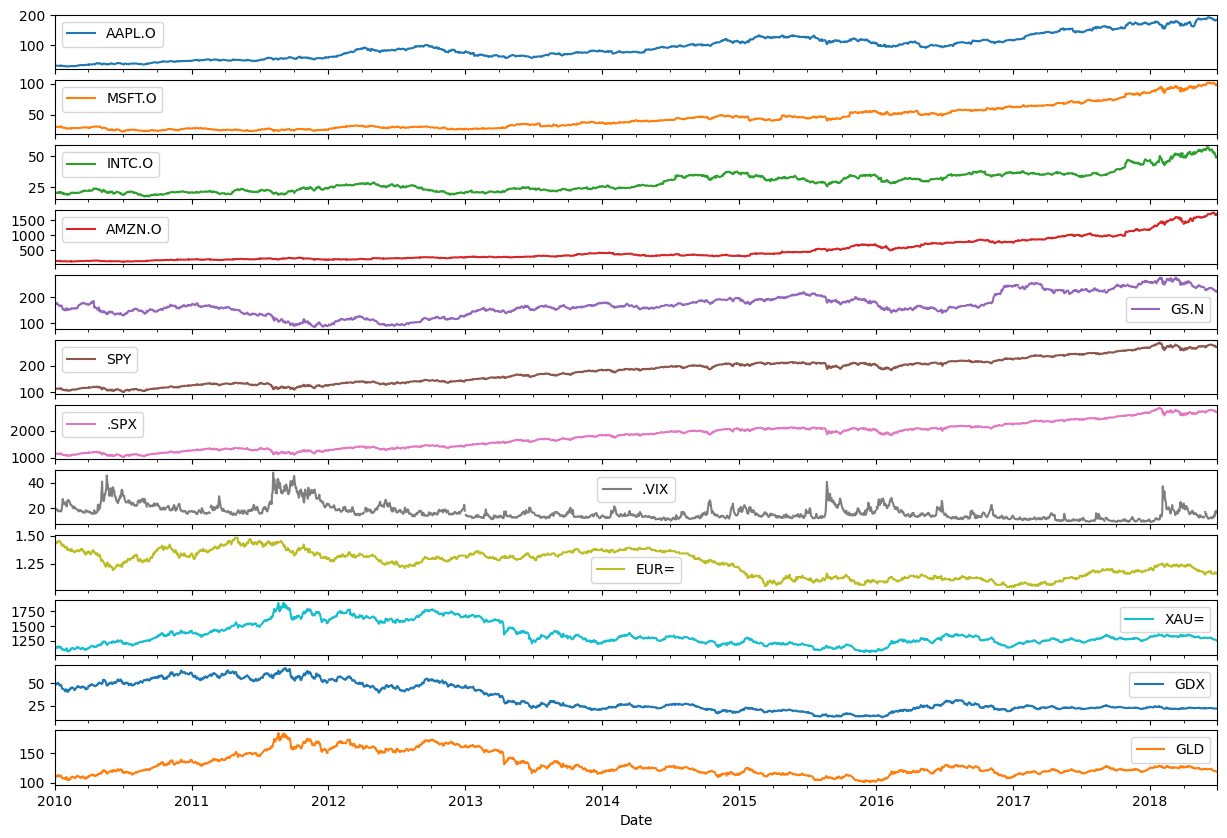

In [56]:
df.plot(figsize=(15, 10), subplots=True)

In [57]:
display(df.head(4))
display(df.diff().head(4))

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,23.65,NaN,NaN
2010-01-05,0.06,0.01,-0.01,0.79,3.06,0.30,3.53,-0.69,0.00,-1.35,0.46,-0.10
2010-01-06,-0.49,-0.19,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.00,19.85,1.17,1.81


In [58]:
df.diff().mean()

AAPL.O    0.064745
MSFT.O    0.031252
INTC.O    0.013552
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072101
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000117
XAU=      0.041887
GDX      -0.015070
GLD      -0.003455
dtype: float64

In [59]:
df.pct_change().head(5)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006993,0.021572,NaN,NaN
2010-01-05,0.001963,0.000323,-0.000479,0.005900,0.017680,0.002647,0.003116,-0.034431,0.000000,-0.001205,0.009642,-0.000911
2010-01-06,-0.015997,-0.006137,-0.003354,-0.018116,-0.010673,0.000704,0.000546,-0.009819,0.000000,0.017745,0.024289,0.016500
2010-01-07,-0.001991,-0.010400,-0.009615,-0.017013,0.019568,0.004221,0.004001,-0.005219,-0.006944,-0.005797,-0.004864,-0.006188


<Axes: >

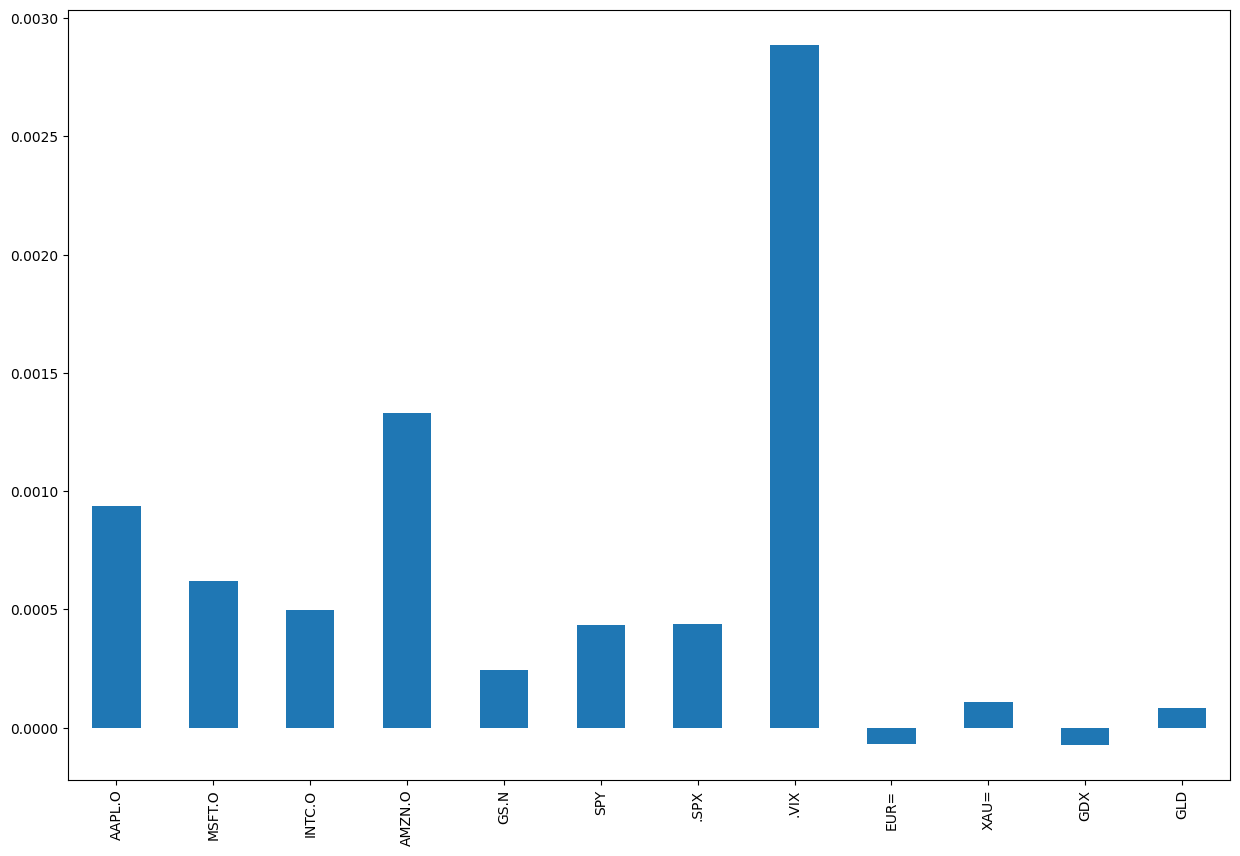

In [60]:
df.pct_change().mean().plot(kind='bar', figsize=(15, 10))

In [61]:
rets = np.log(df / df.shift(1))
symbols = ["AAPL", "MSFT", "INTC", "AMZN", "GS", "SPY", "SPX", "VIX", "EUR", "XAU", "GDX", "GLD"]
df_asset = df.copy()
rets.columns = symbols

<Axes: xlabel='Date'>

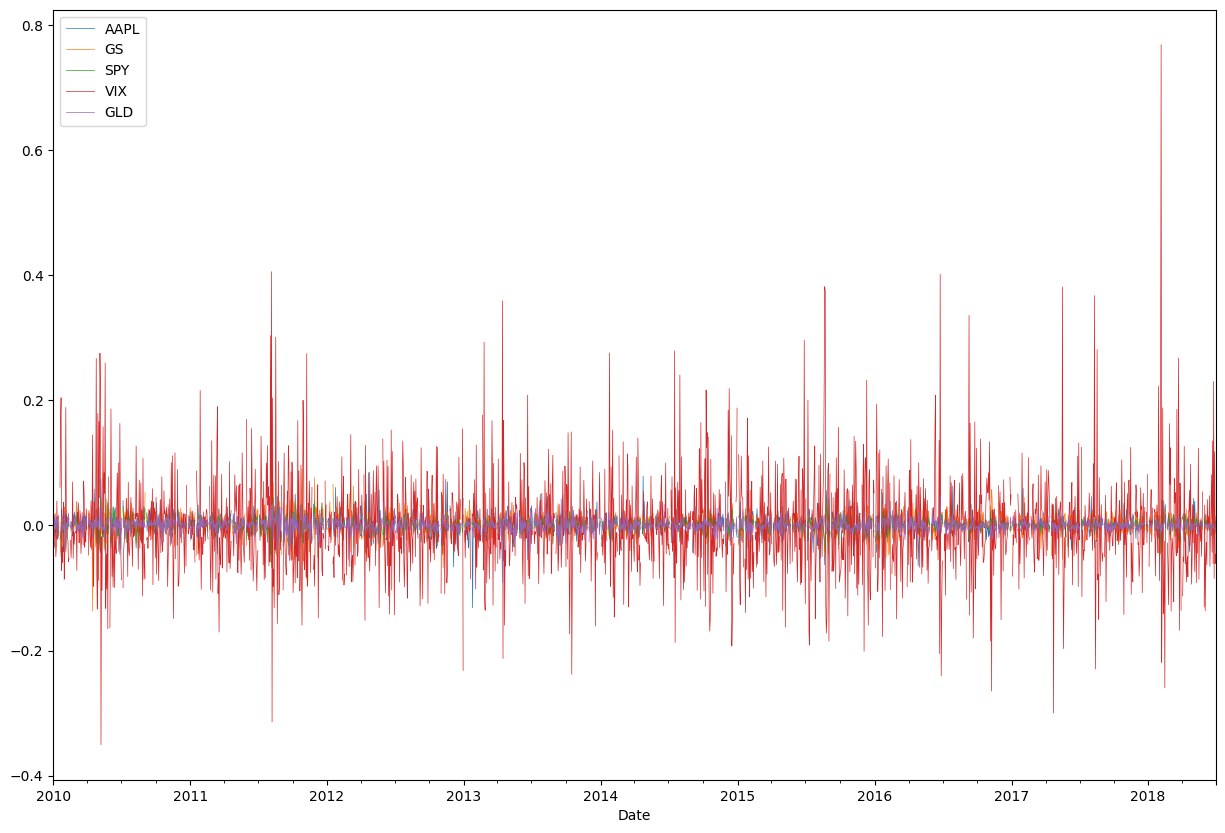

In [62]:
rets[["AAPL", "GS", "SPY", "VIX", "GLD"]].plot(figsize=(15, 10), lw=0.5)

In [63]:
display(rets.mean()*252)

AAPL    0.181369
MSFT    0.124881
INTC    0.096782
AMZN    0.287548
GS      0.028561
SPY     0.097282
SPX     0.098986
VIX    -0.293504
EUR    -0.022830
XAU     0.009427
GDX    -0.104020
GLD    -0.003784
dtype: float64

In [64]:
rets = rets.dropna()

In [65]:
rets.cov()*252

,AAPL,MSFT,INTC,AMZN,GS,SPY,SPX,VIX,EUR,XAU,GDX,GLD
AAPL,0.064026,0.023646,0.023639,0.027066,0.023499,0.021151,0.021235,-0.144459,0.002032,0.001226,0.014513,0.001424
MSFT,0.023646,0.051201,0.030287,0.030386,0.026774,0.022389,0.022518,-0.149149,0.002453,-0.000382,0.010894,-0.000372
INTC,0.023639,0.030287,0.056405,0.025005,0.027758,0.022801,0.022903,-0.151103,0.003371,0.000144,0.012782,0.000170
AMZN,0.027066,0.030386,0.025005,0.095836,0.026640,0.024298,0.024449,-0.171029,0.003552,-0.001377,0.010232,-0.001364
GS,0.023499,0.026774,0.027758,0.026640,0.069593,0.028021,0.028125,-0.185918,0.004005,-0.002703,0.008299,-0.002603
SPY,0.021151,0.022389,0.022801,0.024298,0.028021,0.022050,0.022018,-0.146152,0.003563,0.000047,0.011889,0.000107
SPX,0.021235,0.022518,0.022903,0.024449,0.028125,0.022018,0.022158,-0.147143,0.003596,0.000139,0.012039,0.000193
VIX,-0.144459,-0.149149,-0.151103,-0.171029,-0.185918,-0.146152,-0.147143,1.502097,-0.018502,-0.000343,-0.077766,-0.000078
EUR,0.002032,0.002453,0.003371,0.003552,0.004005,0.003563,0.003596,-0.018502,0.011570,0.004648,0.011675,0.004672
XAU,0.001226,-0.000382,0.000144,-0.001377,-0.002703,0.000047,0.000139,-0.000343,0.004648,0.025561,0.044644,0.025450


In [66]:
import scipy.stats as scs
import statsmodels.api as sm

In [67]:
print(rets.mean().mean()*252)

0.04130194150684135


In [68]:
r = 0.05 # 예상 수익률
M = len(rets) # 기간 
sigma = 0.2 # 변동성

log_return = np.array(rets['SPY'])

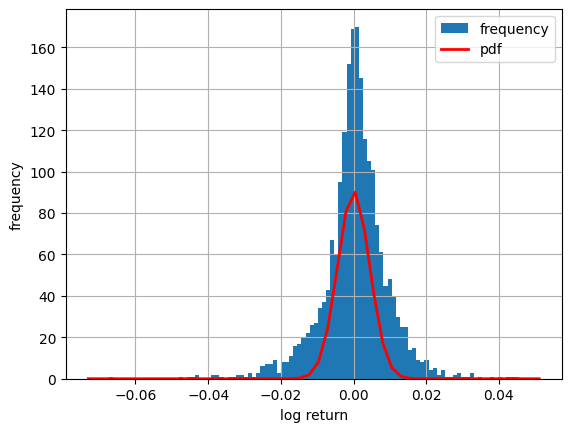

In [69]:
plt.hist(log_return.flatten(), bins=100, label='frequency')
plt.grid(True)
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)), 'r', lw=2, label='pdf')
plt.legend()

In [70]:
def print_stat(array):
    sta = scs.describe(array) # nobs, minmax, mean, variance, skewness, kurtosis
    print(f"mean: {sta[2]}")
    print(f"std: {np.sqrt(sta[3])})")
    print(f"skewness: {sta[4]}")
    print(f"kurtosis: {sta[5]}")

In [71]:
print_stat(log_return)

mean: 0.00038603872907587357
std: 0.009354127350938931)
skewness: -0.5386276197067666
kurtosis: 4.611347558478201


In [72]:
scs.describe(log_return)

DescribeResult(nobs=np.int64(2061), minmax=(np.float64(-0.06734057781115321), np.float64(0.045450496816366155)), mean=np.float64(0.00038603872907587357), variance=np.float64(8.749969849758379e-05), skewness=np.float64(-0.5386276197067666), kurtosis=np.float64(4.611347558478201))

In [73]:
display(scs.skewtest(log_return)[1])
display(scs.kurtosistest(log_return)[1])
display(scs.normaltest(log_return)[1])

np.float64(4.889838687779933e-21)

np.float64(1.3824746097889765e-49)

np.float64(1.5025843911804e-67)

In [74]:
log_return

array([ 0.00264364,  0.00070379,  0.00421238, ..., -0.00831875,
        0.00570119,  0.00143866], shape=(2061,))

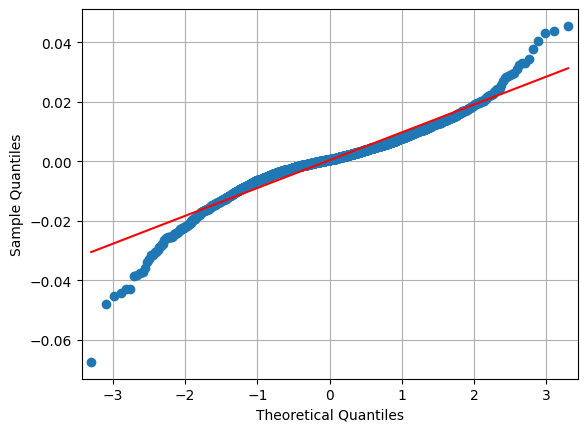

In [75]:
# QQ plot
sm.qqplot(log_return, line= 's')
plt.grid(True)

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'SPY'}>],
       [<Axes: title={'center': 'VIX'}>, <Axes: title={'center': 'GLD'}>]],
      dtype=object)

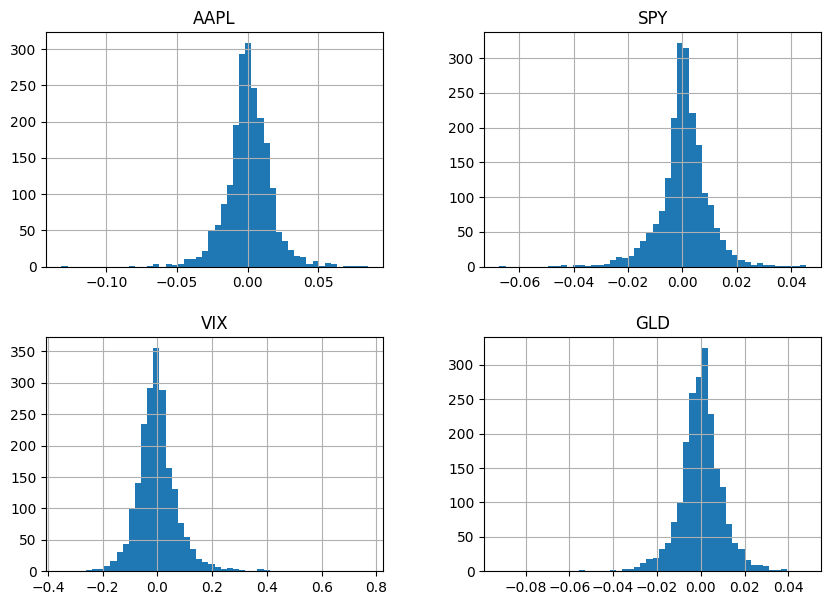

In [76]:
log_returns = rets[["AAPL", "SPY", "VIX", "GLD"]]
log_returns.hist(bins=50, figsize=(10, 7))

In [77]:
rets_asset_summary = rets[["AAPL", "GS", "SPY", "VIX", "GLD"]]

In [78]:
np.random.seed(14)
noa = len(rets_asset_summary.columns) # number of assets
weights = np.random.random(noa)
weights /=np.sum(weights)
weights

array([0.20762712, 0.31234967, 0.35164264, 0.00325087, 0.1251297 ])

In [79]:
np.sum(rets_asset_summary.mean()*weights)*252

np.float64(0.07935884024149117)

In [80]:
prets = [] # portfolio returns
pvols = [] # portfolio volatilities

for p in range(2500):
    weights = np.random.random(noa)
    weights /=np.sum(weights)
    prets.append(np.sum(rets_asset_summary.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov()*252, weights))))
    
prets = np.array(prets)
pvols = np.array(pvols)

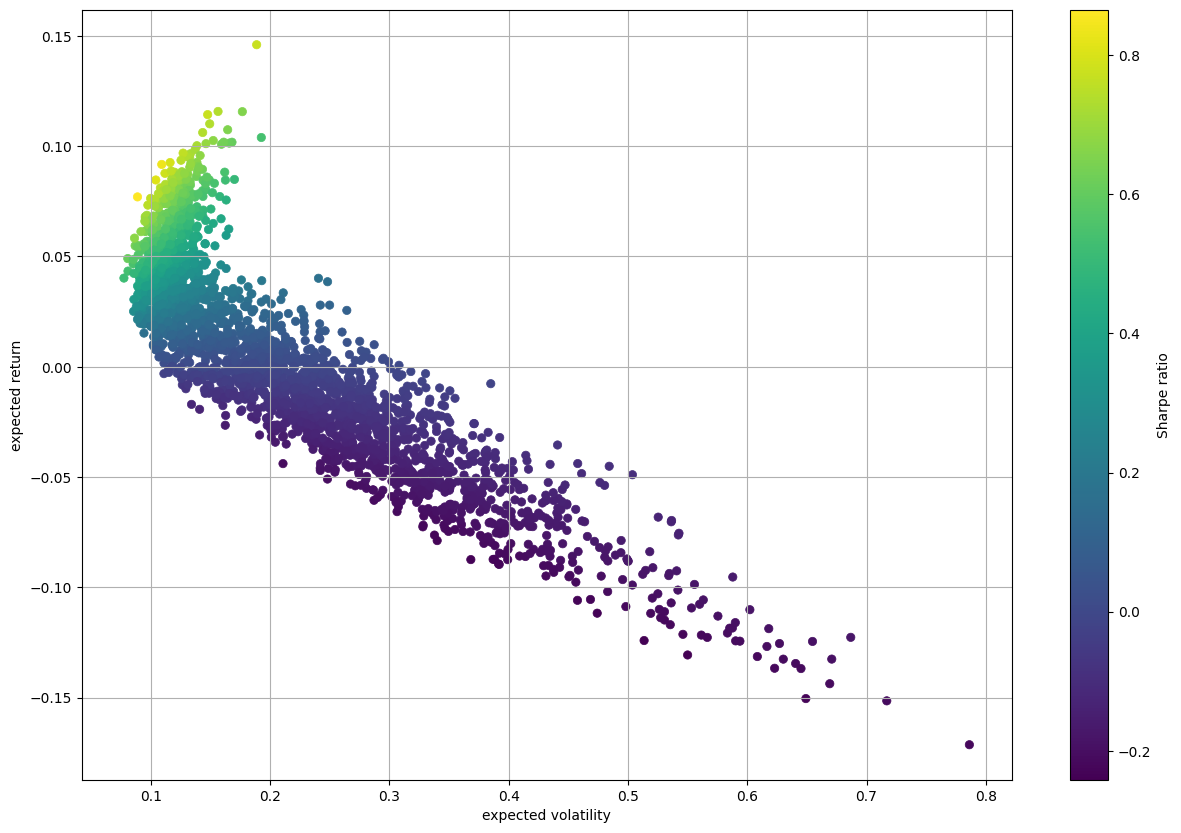

In [81]:
plt.figure(figsize=(15, 10))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', lw=0.5)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio') # objective #maximum drawdown

In [82]:
def stats(weights):
    weights = np.array(weights)
    pret = np.sum(rets_asset_summary.mean()*weights)*252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets_asset_summary.cov()*252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [83]:
def min_sharpe(weights):
    return -stats(weights)[2] # -Sharpe ratio

In [84]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # weights sum to 1
bounds = tuple((0,1) for x in range(noa))

In [85]:
import scipy
optimize = scipy.optimize.minimize(min_sharpe, noa*[1./noa,], method='SLSQP', bounds=bounds, constraints=constraints)
optimize

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.9216716127759239
           x: [ 2.155e-01  0.000e+00  7.145e-01  6.998e-02  0.000e+00]
         nit: 9
         jac: [ 1.291e-04  9.204e-01  2.072e-04 -2.512e-03  7.777e-02]
        nfev: 59
        njev: 9
 multipliers: [-2.314e-06]

In [86]:
rets_asset_summary.columns

Index(['AAPL', 'GS', 'SPY', 'VIX', 'GLD'], dtype='object')

In [87]:
optimize.x.round(3)

array([0.215, 0.   , 0.715, 0.07 , 0.   ])

In [88]:
stats(optimize.x).round(3)

array([0.088, 0.096, 0.922])

In [89]:
rets

,AAPL,MSFT,INTC,AMZN,GS,SPY,SPX,VIX,EUR,XAU,GDX,GLD
Date,,,,,,,,,,,,
2010-01-05,0.001961,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,0.000000,-0.001206,0.009595,-0.000911
2010-01-06,-0.016127,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.000000,0.017589,0.023999,0.016365
2010-01-07,-0.001993,-0.010454,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006969,-0.005814,-0.004876,-0.006207
2010-01-08,0.006627,0.006873,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006969,0.003704,0.014959,0.004951
2010-01-11,-0.008624,-0.012802,0.005744,-0.024335,-0.015902,0.001396,0.001745,-0.032514,0.006920,0.014419,0.006599,0.013202
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-0.013706,-0.013820,0.229947,0.000000,-0.002755,-0.007694,-0.003746
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.002212,0.002202,-0.084863,-0.008584,-0.005040,-0.002730,-0.005269
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-0.008319,-0.008642,0.117783,0.000000,-0.005593,-0.006399,-0.005718


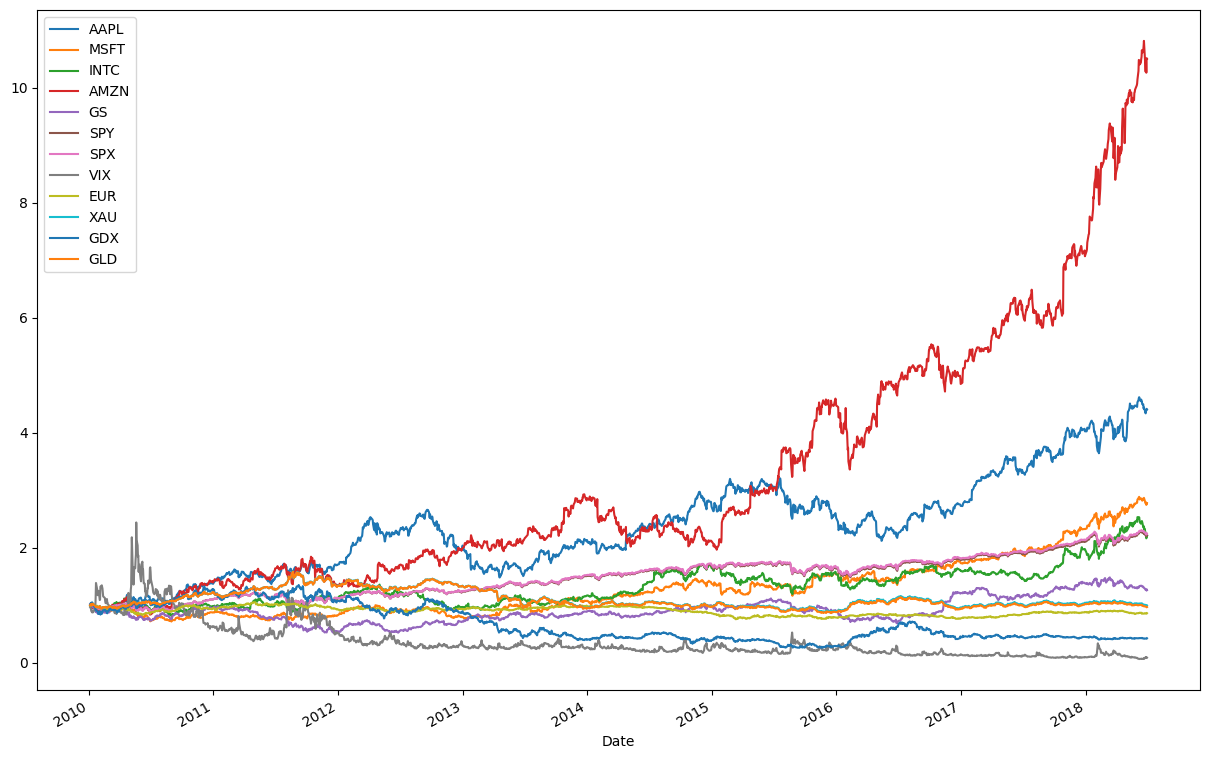

In [90]:
rets.cumsum().apply(np.exp).plot(figsize=(15,10))
plt.show()


In [91]:
df.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-10,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
2010-01-17,29.42,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.44,1129.90,47.42,110.86
2010-01-24,28.25,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.41,1092.60,43.79,107.17
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96


In [92]:
df.resample('1m', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.44,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.39,1081.05,40.72,105.96
2010-02-28,29.23,28.67,20.53,118.40,156.35,110.74,1104.49,19.50,1.36,1116.10,43.89,109.43
2010-03-31,33.57,29.29,22.29,135.77,170.63,117.00,1169.43,17.59,1.35,1112.80,44.41,108.95
2010-04-30,37.30,30.54,22.84,137.10,145.20,118.81,1186.69,22.05,1.33,1178.25,50.51,115.36
2010-05-31,36.70,25.80,21.42,125.46,144.26,109.37,1089.41,32.07,1.23,1215.71,49.86,118.88


<Axes: xlabel='Date'>

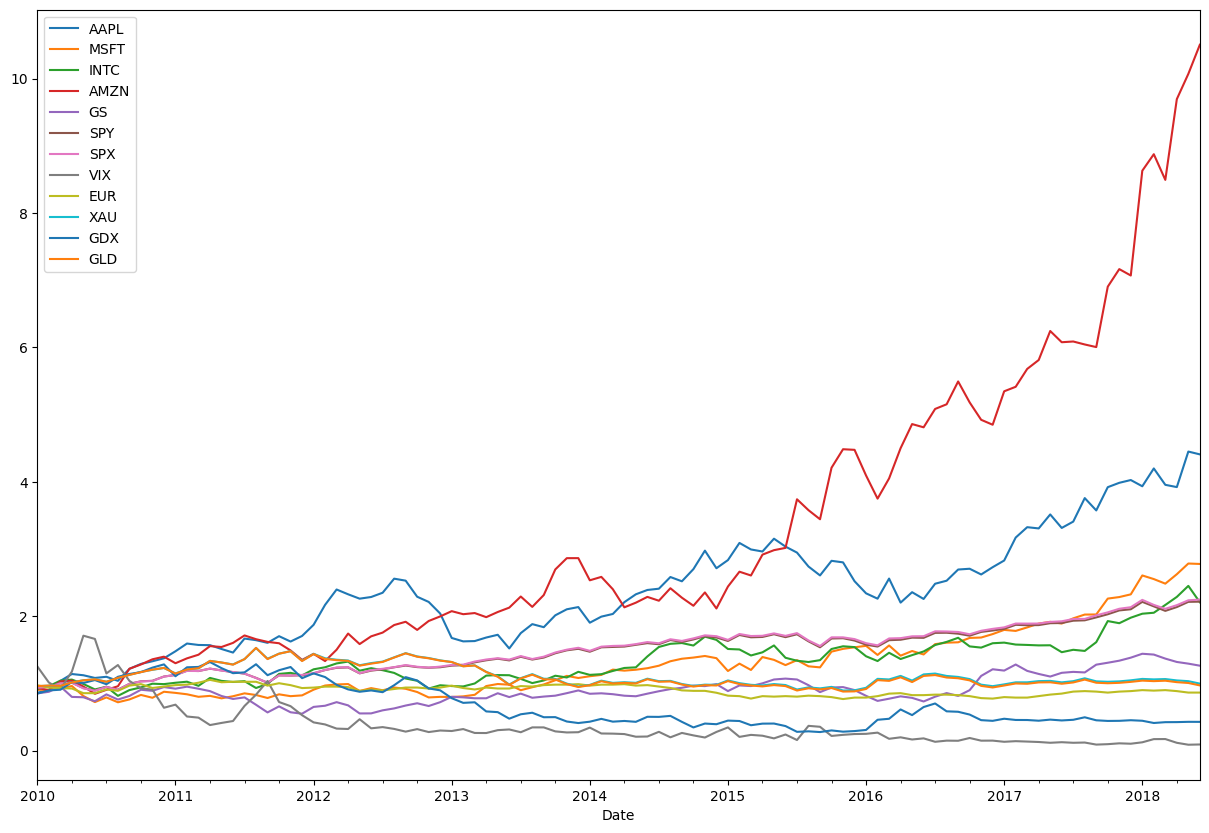

In [93]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(15,10))

In [94]:
# Rolling statistics

sym= "AAPL.O"
df = pd.DataFrame(df[sym].dropna())
df.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [95]:
import math
window=21
df[sym].rolling(window=window).std() * math.sqrt(window)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2018-06-25    14.585752
2018-06-26    15.335008
2018-06-27    16.050582
2018-06-28    16.342679
2018-06-29    16.642230
Name: AAPL.O, Length: 2138, dtype: float64

In [96]:
df['min'] = df[sym].rolling(window=window).min()
df['max'] = df[sym].rolling(window=window).max()
df['mean'] = df[sym].rolling(window=window).mean()
df['median'] = df[sym].rolling(window=window).median()
df['std'] = df[sym].rolling(window=window).std()
df['ewma'] = df[sym].ewm(halflife=0.5, min_periods=window).mean()

In [97]:
df.head(21)

,AAPL.O,min,max,mean,median,std,ewma
Date,,,,,,,
2010-01-04,30.57,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.63,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.14,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.28,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.02,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,29.67,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,30.09,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,29.92,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'AAPL.O rolling stats')

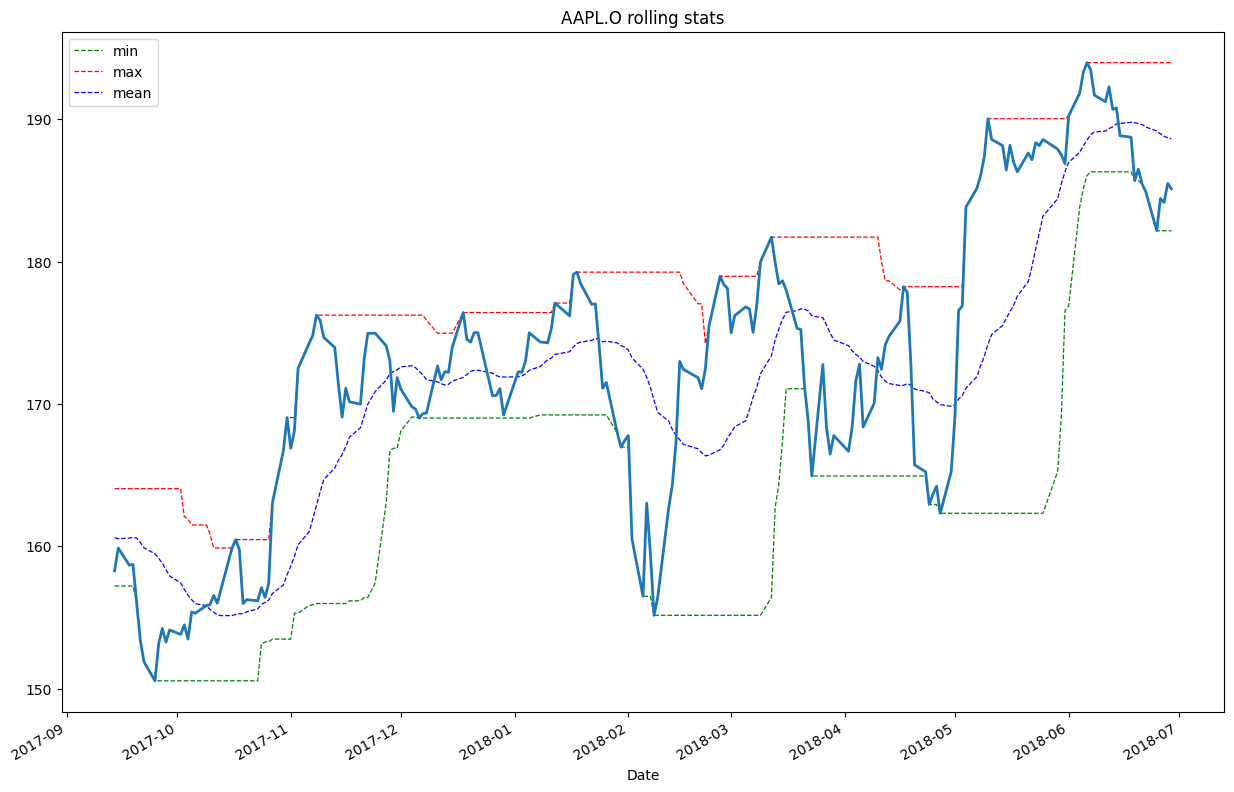

In [98]:
ax = df[['min', 'max', 'mean']].iloc[-200:].plot(figsize=(15,10), style=['g--', 'r--', 'b--'], lw=.9)
df[sym].iloc[-200:].plot(ax=ax, lw=2.)
plt.title(f"{sym} rolling stats")

In [99]:
df['SMA1'] = df[sym].rolling(window=42).mean() # short-term # 21 days = 1month
df['SMA2'] = df[sym].rolling(window=252).mean() # long-term 1 year
df[[sym, 'SMA1', 'SMA2']].tail(5)

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


Text(0.5, 1.0, 'AAPL.O SMA1 & SMA2')

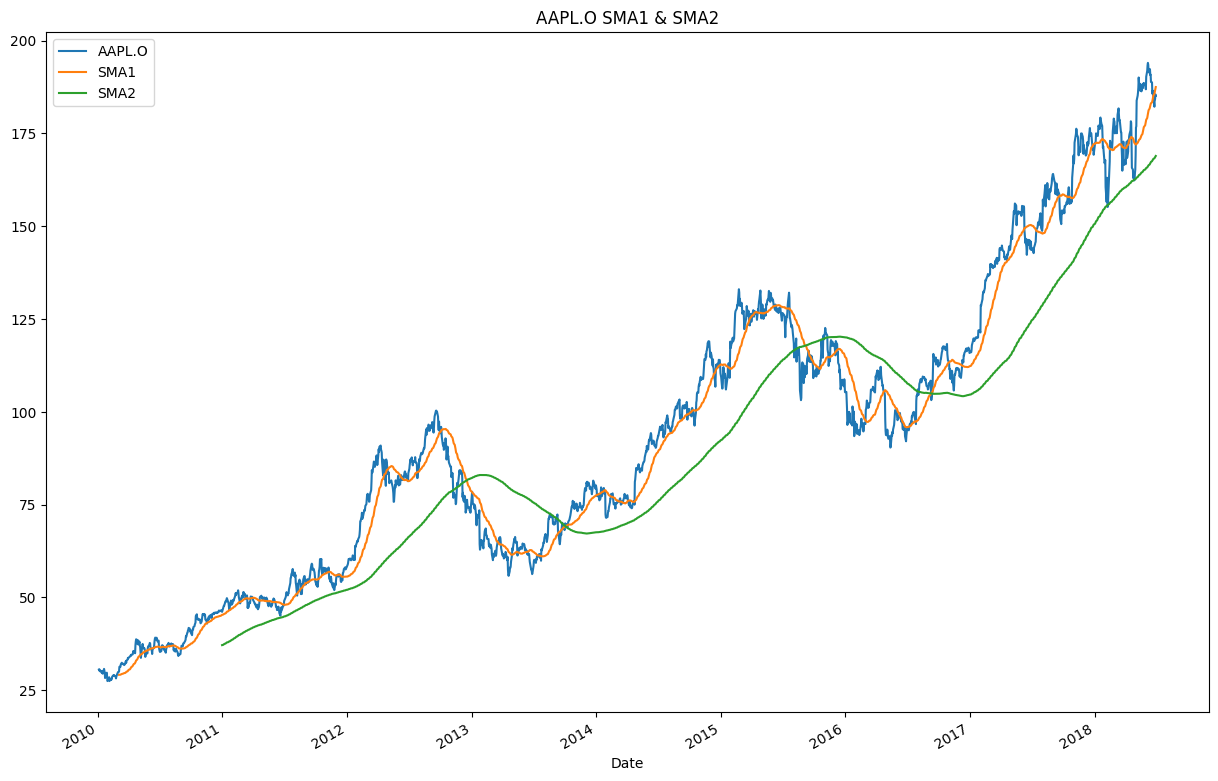

In [100]:
df[[sym, 'SMA1', 'SMA2']].plot(figsize=(15, 10))
plt.title(f"{sym} SMA1 & SMA2")

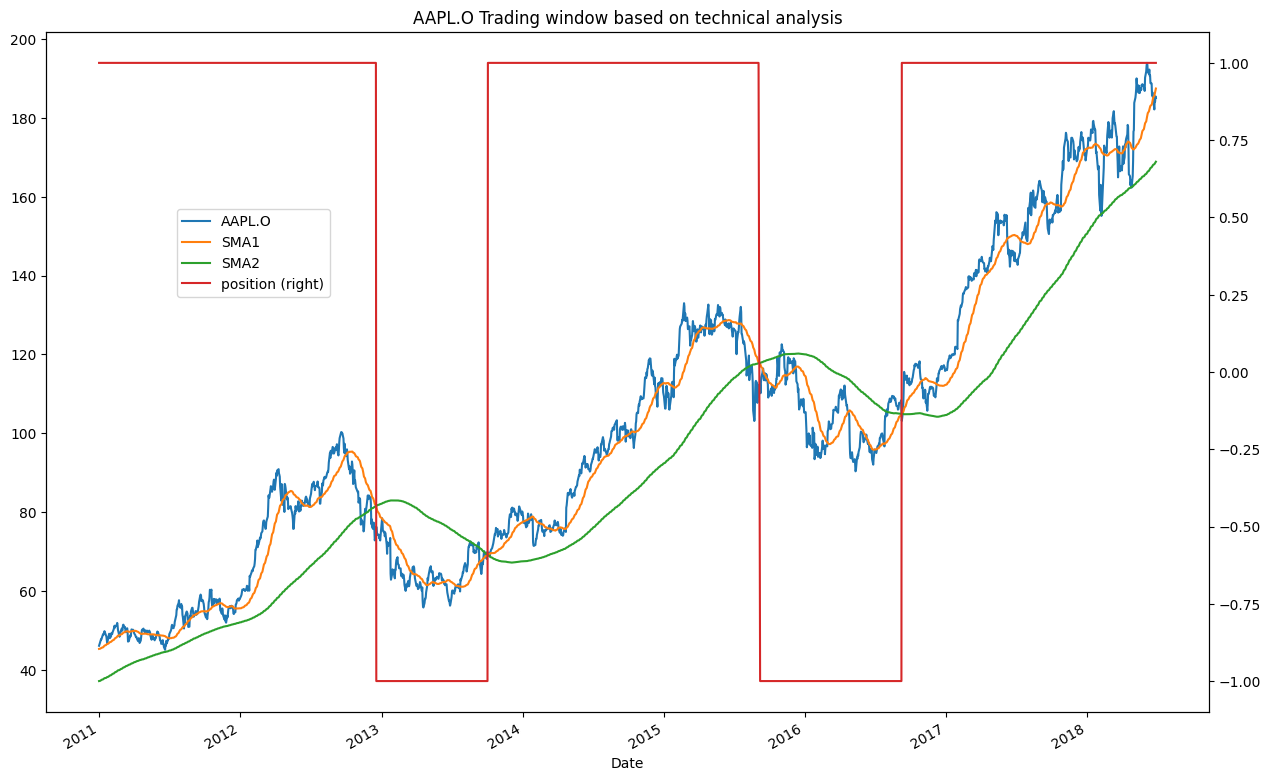

In [102]:
df.dropna(inplace=True)

df['position'] = np.where(df['SMA1'] > df['SMA2'], 1, -1) # 1: buy, -1: sell

ax = df[[sym, 'SMA1', 'SMA2', 'position']].plot(figsize=(15, 10), secondary_y='position')
ax.get_legend().set_bbox_to_anchor((0.25, 0.75))
plt.title(f"{sym} Trading window based on technical analysis")
plt.show()

# auto ARIMA